In [132]:
# Code for: <Add description here>
%load_ext autoreload
%autoreload 2
import cmcrameri.cm as cm  # Importing the cmcrameri colormaps
%run ct_data.py '../crunchtope_model/hydrothermal_crunch.nc' -c volume

for cat in ct_data.keys():
    ct_data[cat] = ct_data[cat].rename_dims({"file_num": "file_number"})


%run pf_data.py '../pflotran_model/hydrothermal.nc'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Primary minerals: ['Anorthite', 'Albite', 'Diopside', 'Hedenbergite', 'Forsterite', 'Fayalite']
Secondary minerals: ['Tremolite', 'Prehnite', 'Talc', 'Quartz', 'Saponite_Mg', 'Epidote', 'Zoisite', 'Chamosite', 'Clinochlore', 'Analcime', 'Anhydrite', 'Calcite', 'Annite']
Primary mineral groups: {'olivine': ['Forsterite', 'Fayalite'], 'clinopyroxenes': ['Diopside', 'Hedenbergite'], 'plagioclases': ['Anorthite', 'Albite']}
Secondary mineral groups: {'clays': ['Saponite_Mg', 'Chamosite', 'Clinochlore'], 'zeolites': ['Analcime'], 'amphiboles': ['Tremolite'], 'inosilicates': ['Prehnite'], 'talc': ['Talc'], 'epidotes': ['Epidote', 'Zoisite'], 'sulfates': ['Anhydrite'], 'carbonates': ['Calcite'], 'quartz': ['Quartz'], 'mica': ['Annite']}
Primary minerals: ['Anorthite', 'Albite', 'Diopside', 'Hedenbergite', 'Forsterite', 'Fayalite']
Secondary minerals: ['Tremolite', 'Prehnite', 'Talc', 'Quartz', 'Saponite_Mg

In [147]:
ct_data['volume'].sel(file_number=9).sel(time=500)

<xarray.Dataset>
Dimensions:                (X: 100, Y: 1, Z: 1)
Coordinates:
  * X                      (X) float64 7.5 22.5 37.5 ... 1.478e+03 1.492e+03
  * Y                      (Y) float64 50.0
  * Z                      (Z) float64 23.44
    time                   float64 500.0
Data variables: (12/35)
    Forsterite             (X, Y, Z) float64 0.0415 0.0415 ... 0.04144 0.04142
    Fayalite               (X, Y, Z) float64 0.006999 0.006999 ... 0.00631
    Diopside               (X, Y, Z) float64 0.315 0.315 0.315 ... 0.315 0.315
    Hedenbergite           (X, Y, Z) float64 0.05 0.05 0.05 ... 0.05003 0.05002
    Anorthite              (X, Y, Z) float64 0.3825 0.3825 ... 0.3825 0.3825
    Albite                 (X, Y, Z) float64 0.1625 0.1625 ... 0.1611 0.1613
    ...                     ...
    carbonates             (X, Y, Z) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    quartz                 (X, Y, Z) float64 4.614e-08 2.241e-08 ... 8.322e-05
    mica                   (X, Y, Z) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    primary_minerals       (X, Y, Z) float64 0.9585 0.9585 ... 0.9562 0.9565
    secondary_minerals     (X, Y, Z) float64 1.609e-05 3.716e-06 ... 0.001848
    percentage_alteration  (X, Y, Z) float64 0.001678 0.0003877 ... 0.1932

In [134]:
ct_vol = total_volume(ct_data['volume'], 'Anhydrite', crunchtope=True)
ct_mols = volume_to_moles(ct_vol, molar_volume)
ct_flux = ct_mols / 500 * 65000e3 / 100 /1e12 * 32
ct_flux

array([0.01851085, 0.0193502 , 0.02022356, 0.0211152 , 0.02242395,
       0.02334019, 0.02242395, 0.0348203 , 0.05666503, 0.07858085,
       0.01205058, 0.01624395, 0.0198504 , 0.02242395, 0.02612664,
       0.02242388, 0.02242412, 0.02242435, 0.02242457, 0.02242479])

In [135]:
#Parameters
time = 1000

In [136]:
# Code for: <Add description here>
import matplotlib.pyplot as plt
from itertools import cycle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes as is_ax

# Define a function for a custom color cycler
def custom_color_cycler():
   # Define a function for a custom Futurist-inspired color cycler
    colors = {
        'Magnesium': '#3498DB',   # Dark steel blue, dignified and cool
        'Sulfate': '#F1C40F',     # Dark, bold red with a lot of presence
        'Calcium': '#2ECC71',     # Dark jade green, distinct and elegant
        'Carbonate': '#E74C3C'    # Dark amethyst, standing apart with a creative, luxurious tone
    }
    
    # Create a color cycle
    return cycle([colors['Magnesium'], colors['Sulfate'], colors['Calcium'], colors['Carbonate']])


def plot_flux(ax, inset_ax, concentrations, data, plot_var,range_sets, legend_entries, crunchtope=False, linestyle='-'):
    """
    plot_flux: <Add description of function>
    """
    if crunchtope:
        dims = ['X', 'Y', 'Z']
        time=500
    else:
        dims = ['x', 'y', 'z']
        time=1000
    
    custom_cycler = custom_color_cycler()

    for conc_range, range_set, legend_entry in zip(concentrations, range_sets, legend_entries):
        # Processing data
        extracted_data = data[plot_var].sel(time=time).isel(file_number=slice(range_set[0], range_set[1] + 1)).mean(dim=dims)
        if plot_var == 'Anhydrite_VF' or plot_var == 'Anhydrite':
            # Scale up by volume
            extracted_data = data[plot_var].sel(time=time).isel(file_number=slice(range_set[0], range_set[1] + 1)).sum(dim=dims)
            volume = extracted_data.to_numpy() * 46.9 * 46.9 * 100 # m^3
            moles = volume_to_moles(volume, molar_volume)
            if crunchtope:
                flux = moles / time * 65000e3 / 100 / 1e12 * 32# tmol/yr
            else:
                flux = moles / time * 65000e3 / 100 / 1e12 # tmol/yr
            extracted_data = flux
        
        if legend_entry == 'HCO$\mathbf{_3^-}$':
            color = next(custom_cycler)
            inset_ax.plot(conc_range, extracted_data, label=legend_entry, color=color, linestyle=linestyle)
            ax.plot([], [], label=legend_entry, color=color, linestyle=linestyle)
        else:
            ax.plot(conc_range, extracted_data, label=legend_entry, color=next(custom_cycler), linestyle=linestyle)
        print(f'For {legend_entry}, the values are {extracted_data}')

In [157]:
def anhydrite_depth(data, crunchtope=False):
    if crunchtope:
        dims = ['X', 'Y', 'Z']
        time=500
        plot_var = 'Anhydrite'
        temperature = np.loadtxt('../crunchtope_model/on_axis_temp.txt')[0:100]
    else:
        dims = ['x', 'y', 'z']
        time=1000
        plot_var = 'Anhydrite_VF'
    # First, create a DataArray for depth, assuming `y` represents depth below seafloor
    depth = 1500 - data[dims[2]]

    mineral_data = data[plot_var].sel(time=time)

    if crunchtope:
        weighted_depth = mineral_data * xr.DataArray(temperature, dims='X')
    else:
        weighted_depth = data['Temperature'].sel(time=time) * mineral_data

    # Sum the weighted depth and the total mineral amount
    total_weighted_depth = weighted_depth.sum(dim=dims)
    total_mineral_amount = mineral_data.sum(dim=dims)

    # Calculate the average depth weighted by the amount of mineral
    average_depth = total_weighted_depth / total_mineral_amount

    # Extract the average value (as it may return a DataArray)
    average_depth_value = average_depth.to_numpy()

    return average_depth_value

In [158]:
# Code for: <Add description here>

def total_volume(data, mineral, crunchtope=False):
    """
    total_volume: <Add description of function>
    """
    if crunchtope:
        dims = ['X', 'Y', 'Z']
    else:
        dims = ['x', 'y', 'z']
    # Sum variables over all coordinates and select the final time 
    total_vf = data.sum(dim=dims).sel(time=500)[mineral].to_numpy()
    total_volume = total_vf * 46.9 * 46.9 * 100 # m^3 

    return total_volume

def volume_to_moles(volume, molar_volume):
    """
    volume_to_moles: <Add description of function>
    """
    moles = volume / molar_volume
    return moles

molar_volume = 46.01 * (0.01 ** 3) # cm3/mol

vol = total_volume(pf_data, "Anhydrite_VF")
moles = volume_to_moles(vol, molar_volume)
flux = moles / time *65000e3 /100 /1e12
#s_moles_to_flux(moles) / 100

For SO$\mathbf{_4^{2-}}$, the values are [0.03814656 0.13519814 0.22165878 0.28798424 0.38101966]
For HCO$\mathbf{_3^-}$, the values are [0.2880507  0.28782794 0.28760396 0.28737739 0.28714827]
For Ca$\mathbf{^{2+}}$, the values are [0.28798424 0.32887082 0.36398828 0.36872505]
For Mg$\mathbf{^{2+}}$, the values are [0.28355156 0.28472796 0.28606626 0.28714127 0.28798424 0.28819807]
For SO$\mathbf{_4^{2-}}$, the values are [0.01205058 0.01624395 0.0198504  0.02242395 0.02612664]
For HCO$\mathbf{_3^-}$, the values are [0.02242388 0.02242412 0.02242435 0.02242457 0.02242479]
For Ca$\mathbf{^{2+}}$, the values are [0.02242395 0.0348203  0.05666503 0.07858085]
For Mg$\mathbf{^{2+}}$, the values are [0.01851085 0.0193502  0.02022356 0.0211152  0.02242395 0.02334019]
<xarray.DataArray 'Anhydrite_VF' (file_number: 5, x: 32, y: 1, z: 32)>
array([[[[9.604745e-04, ..., 0.000000e+00]],

        ...,

        [[1.030991e-06, ..., 0.000000e+00]]],


       ...,


       [[[9.604793e-04, ..., 0.0000

/var/folders/86/d5n0l2wj5yn0p84q_4jzm_6r0000gn/T/ipykernel_99899/2040900707.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/var/folders/86/d5n0l2wj5yn0p84q_4jzm_6r0000gn/T/ipykernel_99899/2040900707.py:71: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


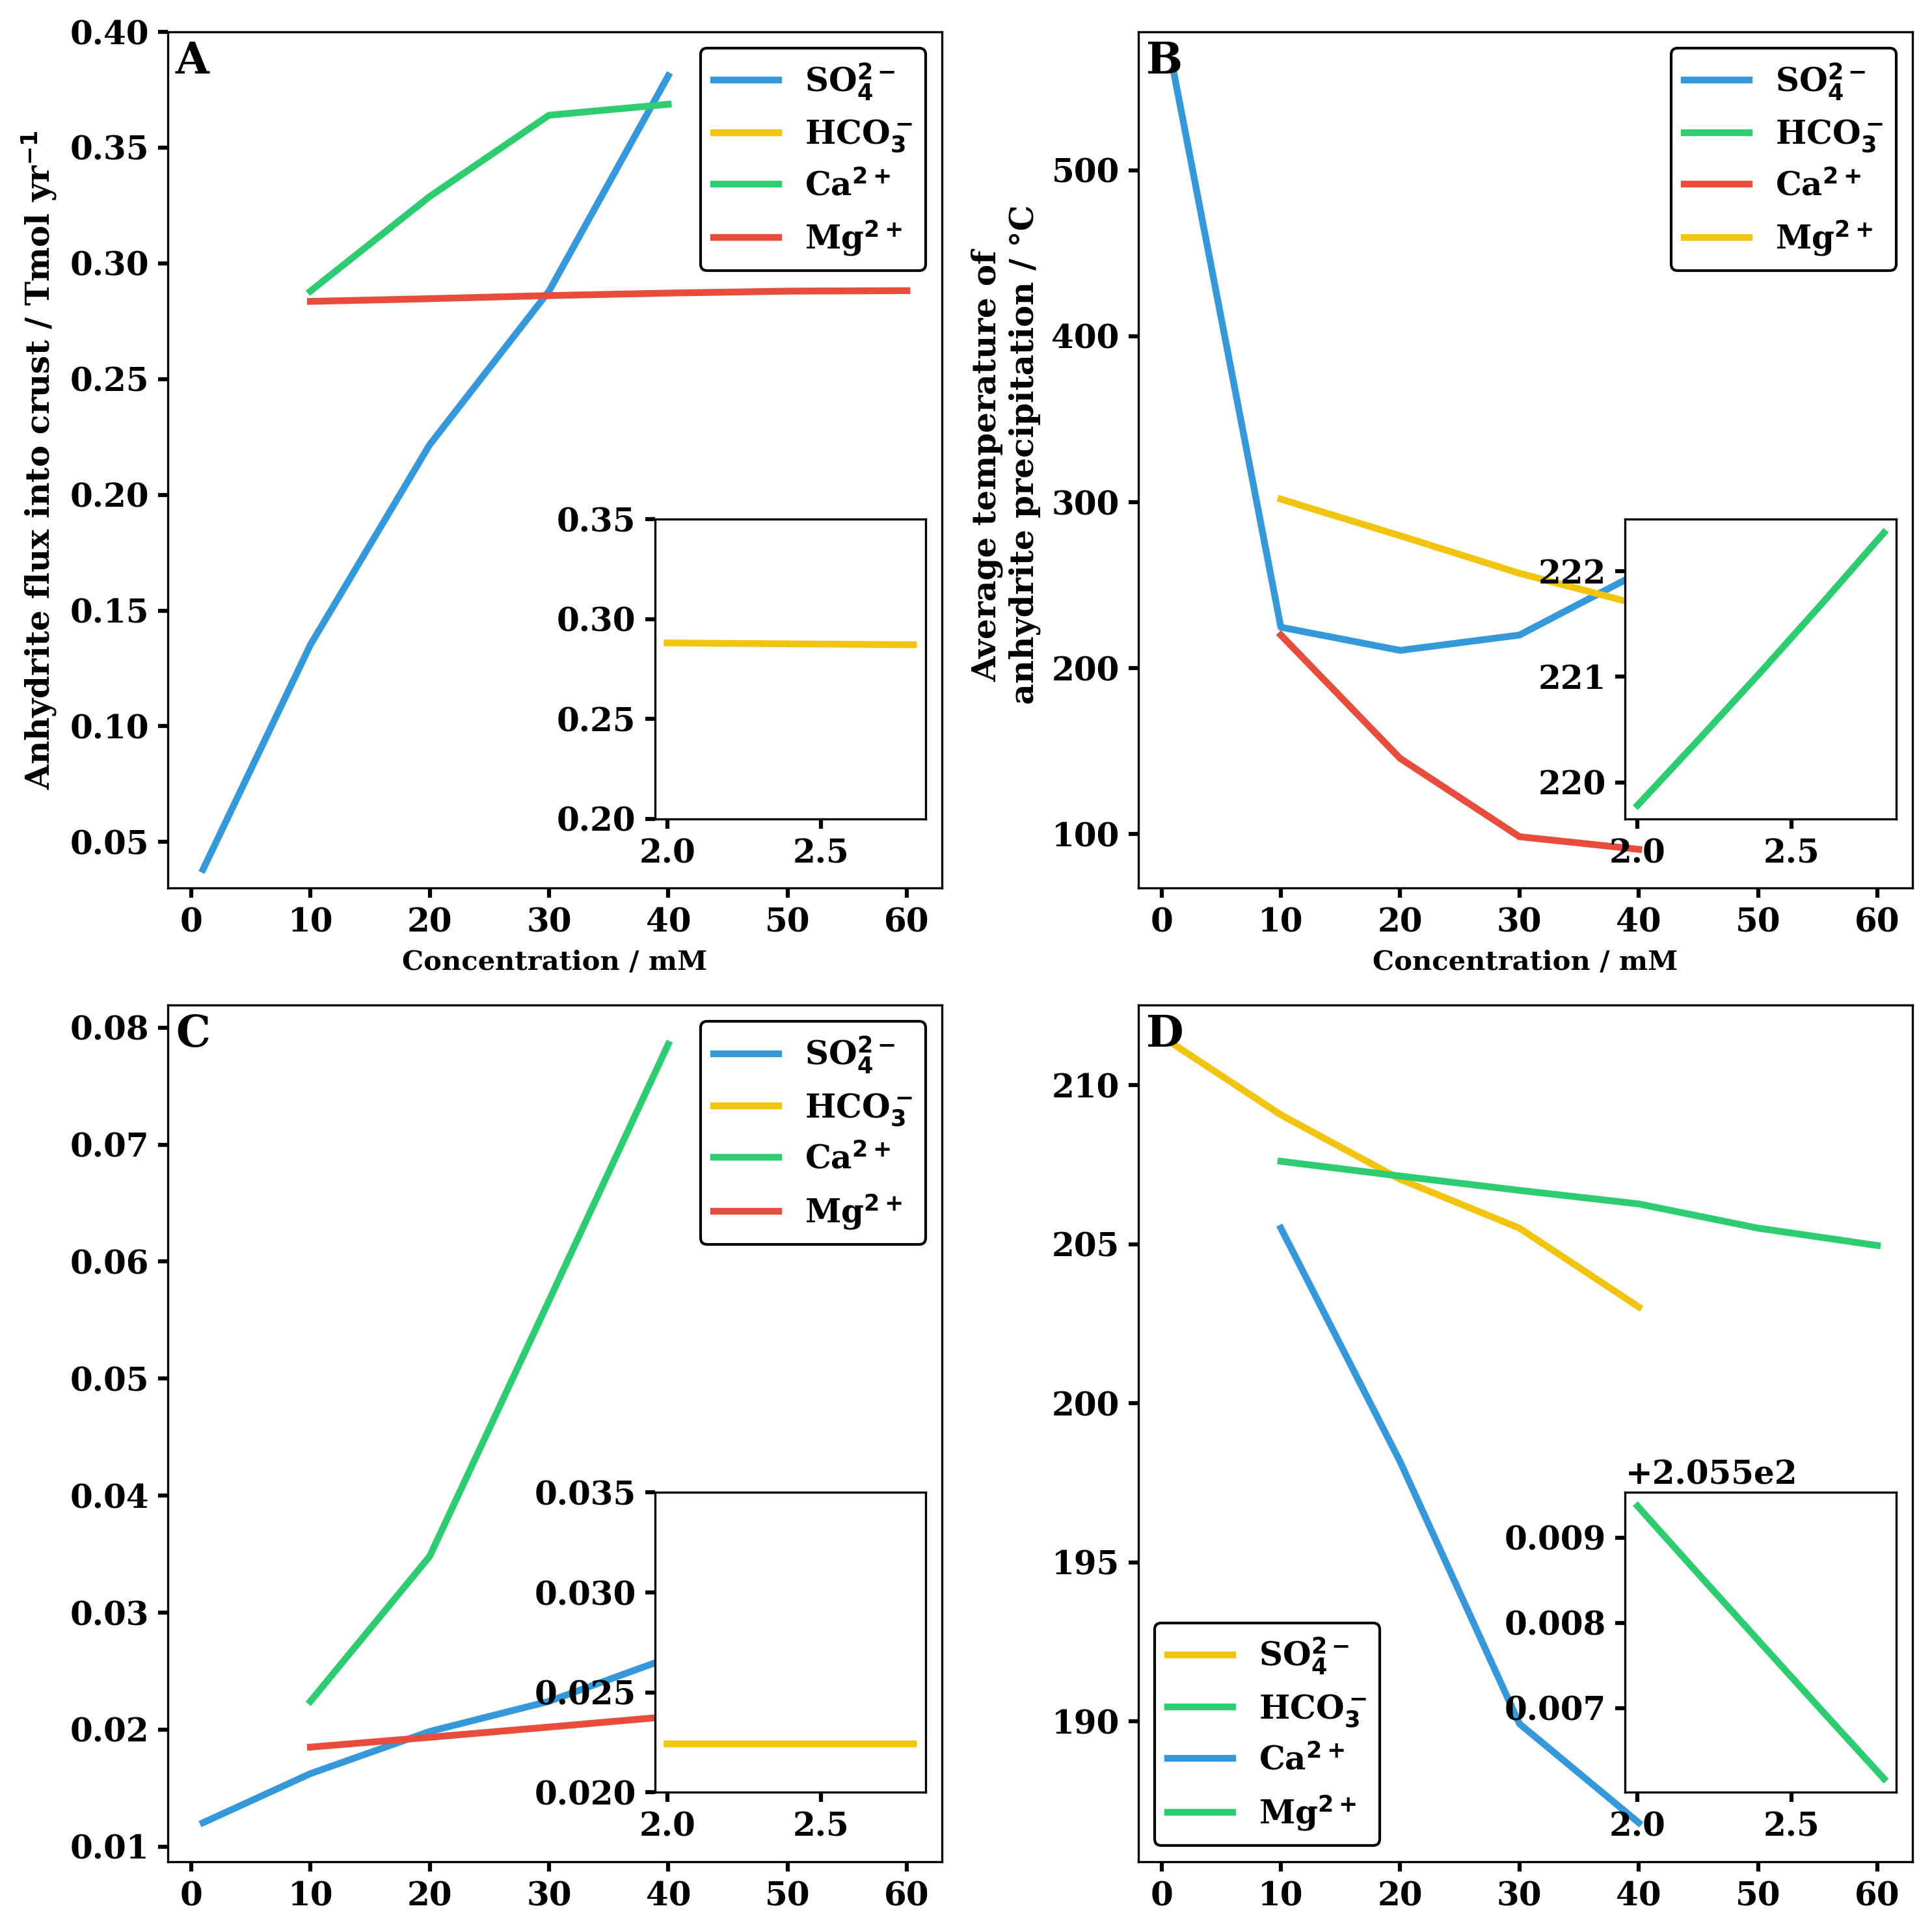

In [164]:
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('custom.mplstyle')
from cmcrameri import cm
import numpy as np
import copy
import string


# Create figure and axes
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax = ax.flatten()

fontsize = fig.bbox_inches.width * 1.2

# Add capital letter labels to the subplots
for i, axis in enumerate(ax):
    axis.text(0.01, 0.99, string.ascii_uppercase[i], transform=axis.transAxes,
              fontsize=16, fontweight='bold', va='top')

# Example data and parameters
leg_entries = ['SO$\mathbf{_4^{2-}}$', 'HCO$\mathbf{_3^-}$', 'Ca$\mathbf{^{2+}}$', 'Mg$\mathbf{^{2+}}$']
range_sets = [(10, 14), (15, 19), (6, 9), (0, 5)]
concentrations = [[1, 10, 20, 30, 40],  # SO4
                  [2.0, 2.2, 2.4, 2.6, 2.8],  # HCO3
                  [10, 20, 30, 40],  # Ca
                  [10, 20, 30, 40, 50, 60]]  # Mg
inset_axes = []
for axis in ax:
    inset_axis = is_ax(axis,
                    width="70%", # width = 30% of parent_bbox
                    height="70%", # height : 1 inch
                    bbox_to_anchor=(0.5, -0.05, 0.5, 0.5),
                    bbox_transform=axis.transAxes)
    inset_axes.append(inset_axis)


# Plot flux (dummy function for example)
plot_var = 'Anhydrite_VF'
plot_flux(ax[0], inset_axes[0], concentrations, pf_data, plot_var, range_sets, leg_entries)
plot_flux(ax[2], inset_axes[2], concentrations, ct_data['volume'], 'Anhydrite', range_sets, leg_entries, crunchtope=True)

custom_cycle = custom_color_cycler()
for conc_range, range_set, legend_entry in zip(concentrations, range_sets, leg_entries):
    if legend_entry == 'HCO$\mathbf{_3^-}$':
        color = next(custom_cycle)
        inset_axes[1].plot(conc_range, anhydrite_depth(pf_data.isel(file_number=slice(range_set[0], range_set[1] + 1))), label=legend_entry, color=color)
        ax[1].plot([], [], label=legend_entry, color=color)
        inset_axes[3].plot(conc_range, anhydrite_depth(ct_data['volume'].isel(file_number=slice(range_set[0], range_set[1] + 1)), crunchtope=True), label=legend_entry, color=color)
        ax[3].plot([], [], label=legend_entry, color=color)
    else:
        color = next(custom_cycle)
        ax[1].plot(conc_range, anhydrite_depth(pf_data.isel(file_number=slice(range_set[0], range_set[1] + 1))), label=legend_entry, color=color)
        ax[3].plot(conc_range, anhydrite_depth(ct_data['volume'].isel(file_number=slice(range_set[0], range_set[1] + 1)), crunchtope=True), label=legend_entry, color=color)

ax[0].set_ylabel('Anhydrite flux into crust / Tmol yr$^{-1}$', fontsize=fontsize)
ax[0].set_xlabel('Concentration / mM')
ax[0].set_ylim(0.03, 0.4)
ax[1].set_ylabel('Average temperature of \n anhydrite precipitation / °C', fontsize=fontsize)
ax[1].set_xlabel('Concentration / mM')
ax[0].legend()

ax[1].legend()
ax[2].legend()
ax[3].legend()

inset_axes[0].set_ylim(0.2, 0.35)
inset_axes[2].set_ylim(0.02, 0.035)

# Show and save the figure
fig.tight_layout()
fig.show()
fig.savefig('output/figure_5.png', dpi=300, transparent=True)

